In [1]:

from sklearn.datasets import fetch_openml
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

def load_dataset(partition):
    X,y = fetch_openml('mnist_784', version=1, return_X_y=True)
    y = y.astype(int)[:int(len(X)*partition//1)]
    X = X/255
    X=X[:int(len(X)*partition//1)]
    print(len(X))
    return X,y

In [2]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler

X,y= load_dataset(.02)

c:\Users\schio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


1400


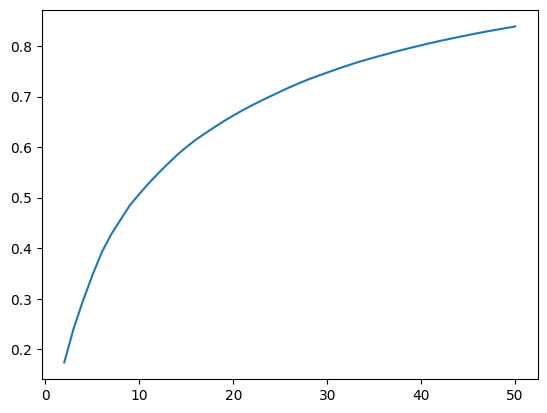

In [3]:
from matplotlib import pyplot as plt

n_components=50
pca=PCA(n_components=n_components)
pca.fit(X)

ks=np.arange(2,n_components+1)
plt.plot(ks,np.cumsum(pca.explained_variance_ratio_)[ks-1])
Xs=pca.transform(X)



In [4]:
from sklearn.cluster import SpectralClustering

pca=PCA(n_components=2)
pca.fit(X)
Xs=pca.transform(X)
sc=SpectralClustering(10)
sc.fit(Xs)

SpectralClustering(n_clusters=10)

In [5]:
from sklearn.cluster import MeanShift


ms=MeanShift(bandwidth=1.5)
ms.fit(Xs)

MeanShift(bandwidth=1.5)

In [8]:
y3=ms.fit_predict(Xs)
y2=sc.fit_predict(Xs)
print(y2)
print(y3)
print(y)

[0 4 0 ... 8 0 5]
[1 1 2 ... 1 1 2]
0       5
1       0
2       4
3       1
4       9
       ..
1395    2
1396    9
1397    2
1398    6
1399    9
Name: class, Length: 1400, dtype: int32


In [9]:
print(y2)

[0 4 0 ... 8 0 5]


In [7]:

28*28

784